# Spectral Clustering for Image Segmentation

In [ ]:
# Don't run
!kaggle datasets download -d balraj98/berkeley-segmentation-dataset-500-bsds500
!unzip berkeley-segmentation-dataset-500-bsds500.zip

Eseguendo K-means sull'immagine 100075...


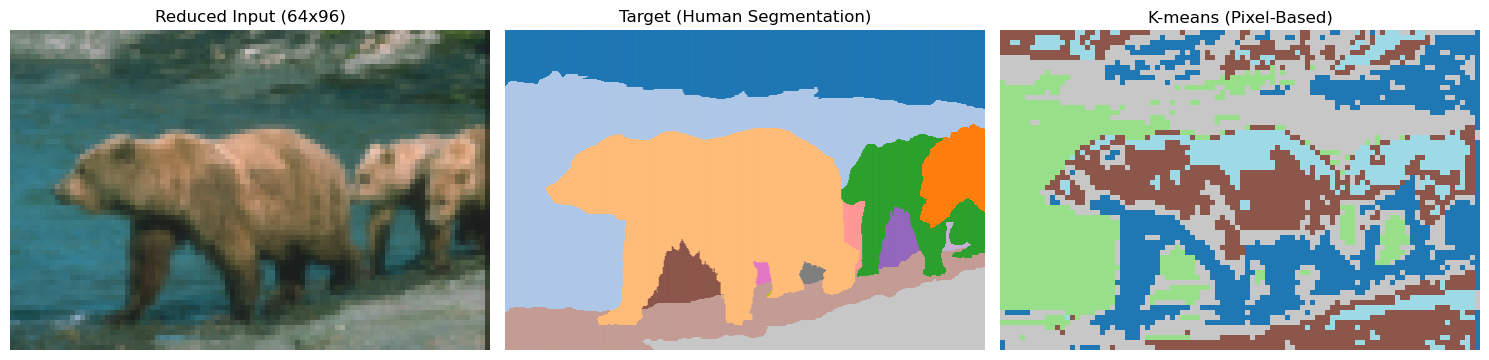

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from skimage import io, transform
from sklearn.cluster import KMeans

BASE_DIR = '.' 
IMG_DIR = os.path.join(BASE_DIR, 'images', 'train')
GT_DIR = os.path.join(BASE_DIR, 'ground_truth', 'train')

img_filename = sorted([f for f in os.listdir(IMG_DIR) if f.endswith('.jpg')])[0]
img_id = img_filename.split('.')[0]

img = io.imread(os.path.join(IMG_DIR, img_filename))
mat_data = scipy.io.loadmat(os.path.join(GT_DIR, f"{img_id}.mat"))
gt_seg = mat_data['groundTruth'][0, 0]['Segmentation'][0][0]

SCALE_PERCENT = 0.2  
h, w = int(img.shape[0] * SCALE_PERCENT), int(img.shape[1] * SCALE_PERCENT)
img_small = transform.resize(img, (h, w), anti_aliasing=True)
flat_image = img_small.reshape(-1, 3)

print(f"Eseguendo K-means sull'immagine {img_id}...")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(flat_image)

kmeans_seg = labels.reshape(h, w)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img_small)
ax[0].set_title(f"Reduced Input ({h}x{w})")
ax[0].axis('off')

ax[1].imshow(gt_seg, cmap='tab20')
ax[1].set_title("Target (Human Segmentation)")
ax[1].axis('off')

ax[2].imshow(kmeans_seg, cmap='tab20')
ax[2].set_title("K-means (Pixel-Based)")
ax[2].axis('off')

plt.tight_layout()
plt.show()